In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import pylab as pl
%pylab inline

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('Fatal_Collisions.csv')

In [3]:
#add geometry
shp = gpd.read_file('neighbourhood/Neighbourhoods.shp')
shp_wgs = shp.to_crs({'init': 'epsg:4326'})

data['geometry'] = (list(zip(data['X'], data['Y'])))
data['geometry'] = data.geometry.apply(lambda x: Point(x))
data.head()

,X,Y,Index_,ACCNUM,YEAR,DATE,TIME,Hour,STREET1,STREET2,...,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,Hood_ID,Neighbourh,ObjectId,geometry
0,-79.227590,43.816245,7377669,1275814,2012,2012-01-12T05:00:00.000Z,558,5,NEILSON RD,FINCH AVE E,...,Yes,,Yes,,,,132,Malvern (132),1,POINT (-79.22759000000001 43.816245)
1,-79.447742,43.637614,80000014,131058335,2013,2013-11-29T05:00:00.000Z,558,5,1491 LAKE SHORE BLVD W,,...,,Yes,Yes,,,,85,South Parkdale (85),2,POINT (-79.44774200000001 43.637614)
2,-79.259883,43.716773,80944448,8001077165,2018,2018-06-14T04:00:00.000Z,558,5,ST CLAIR AVE E,DANFORTH RD,...,,,Yes,,,,120,Clairlea-Birchmount (120),3,POINT (-79.259883 43.716773)
3,-79.316890,43.821345,6253540,1162012,2010,2010-04-13T04:00:00.000Z,559,5,STEELES AVE E,BIRCHMOUNT RD,...,Yes,,Yes,Yes,,Yes,116,Steeles (116),4,POINT (-79.31689 43.821345)
4,-79.574641,43.728129,80501551,4003267619,2014,2014-11-09T05:00:00.000Z,559,5,KIPLING AVE,WESTHUMBER BLVD,...,Yes,,Yes,Yes,,,4,Rexdale-Kipling (4),5,POINT (-79.574641 43.728129)


In [4]:
#filter truck points
data1 = data[['YEAR','DATE','SPEEDING','TRUCK','VISIBILITY','LIGHT','LOCCOORD','TRAFFCTL',
              'FATAL_NO','IMPACTYPE','ROAD_CLASS','District','LONGITUDE','LATITUDE','geometry']]

In [5]:
data1.shape

(610, 15)

In [6]:
data_truck = data1[data1['TRUCK']=='Yes']
data_truck.head()

,YEAR,DATE,SPEEDING,TRUCK,VISIBILITY,LIGHT,LOCCOORD,TRAFFCTL,FATAL_NO,IMPACTYPE,ROAD_CLASS,District,LONGITUDE,LATITUDE,geometry
12,2014,2014-09-10T04:00:00.000Z,,Yes,Clear,"Dark, artificial",Mid-Block,No Control,27,Pedestrian Collisions,Laneway,Toronto and East York,-79.379863,43.655387,POINT (-79.379863 43.655387)
17,2011,2011-10-21T04:00:00.000Z,,Yes,Clear,Dark,Intersection,Traffic Signal,29,Pedestrian Collisions,Major Arterial,Toronto and East York,-79.394990,43.645445,POINT (-79.39499000000001 43.645445)
25,2009,2009-03-11T04:00:00.000Z,,Yes,Rain,Dark,Intersection,Traffic Signal,7,Pedestrian Collisions,Major Arterial,Etobicoke York,-79.564769,43.766535,POINT (-79.564769 43.766535)
27,2017,2017-09-15T04:00:00.000Z,Yes,Yes,Clear,Daylight,Mid-Block,No Control,41,Turning Movement,Major Arterial,Etobicoke York,-79.612880,43.755641,POINT (-79.61288 43.755641)
35,2013,2013-10-16T04:00:00.000Z,,Yes,Clear,Daylight,Mid-Block,No Control,49,Cyclist Collisions,Major Arterial,Toronto and East York,-79.397853,43.652507,POINT (-79.397853 43.652507)


In [7]:
data_truck.shape

(66, 15)

In [8]:
data_truck.sort_values(by = 'FATAL_NO',ascending = False).head()

,YEAR,DATE,SPEEDING,TRUCK,VISIBILITY,LIGHT,LOCCOORD,TRAFFCTL,FATAL_NO,IMPACTYPE,ROAD_CLASS,District,LONGITUDE,LATITUDE,geometry
552,2017,2017-12-20T05:00:00.000Z,,Yes,Other,Daylight,Intersection,Traffic Signal,60,Cyclist Collisions,Major Arterial,Toronto and East York,-79.422664,43.654326,POINT (-79.422664 43.654326)
193,2015,2015-11-27T05:00:00.000Z,,Yes,Clear,Dark,Intersection,Traffic Signal,58,Pedestrian Collisions,Major Arterial,Toronto and East York,-79.425548,43.700984,POINT (-79.42554799999999 43.70098400000001)
577,2017,2017-12-15T05:00:00.000Z,,Yes,Other,Daylight,Intersection,Traffic Signal,57,Pedestrian Collisions,Minor Arterial,Toronto and East York,-79.373821,43.648543,POINT (-79.37382099999999 43.648543)
555,2017,2017-11-24T05:00:00.000Z,,Yes,Clear,Daylight,Mid-Block,No Control,54,Pedestrian Collisions,Major Arterial,Scarborough,-79.322238,43.775355,POINT (-79.322238 43.775355)
355,2016,2016-08-05T04:00:00.000Z,Yes,Yes,Clear,Daylight,Mid-Block,No Control,51,Approaching,Major Arterial,Etobicoke York,-79.611308,43.720599,POINT (-79.61130799999999 43.720599)


In [9]:
#data_truck.to_csv('data_truck.csv')

In [10]:
#Finding1: weather could be the cause, but not the main cause
data_truck[data_truck['VISIBILITY'] == 'Clear'].shape

(53, 15)

In [11]:
truck_vis = data_truck.groupby(by = 'VISIBILITY')['FATAL_NO'].count()

Text(0.5, 1.0, 'weather condition')

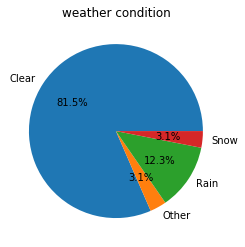

In [12]:
plt.pie(truck_vis.values[1:], labels=truck_vis.index[1:], autopct='%1.1f%%')
plt.title("weather condition")

In [13]:
#Finding2: intersection is the high occurance site for accidents
data_truck[data_truck['LOCCOORD'] == 'Intersection'].shape

(43, 15)

In [14]:
truck_loca = data_truck.groupby(by = 'LOCCOORD')['FATAL_NO'].count()

Text(0.5, 1.0, 'intersection or not')

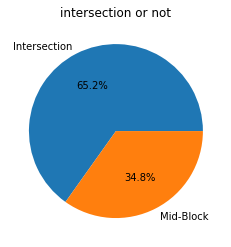

In [15]:
plt.pie(truck_loca.values, labels=truck_loca.index, autopct='%1.1f%%')
plt.title("intersection or not")

In [16]:
#Finding3: Accidents mostly happen on daylight
truck_light = data_truck.groupby(by = 'LIGHT')['FATAL_NO'].count()

Text(0.5, 1.0, 'Time of the Day')

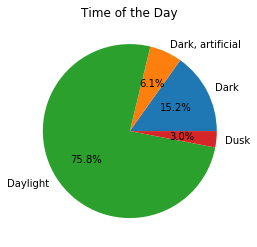

In [17]:
plt.pie(truck_light.values, labels=truck_light.index, autopct='%1.1f%%')
plt.title("Time of the Day")

In [18]:
#Finding4: accident types vary, mainly focusing on pedestrian collisions
truck_victim = data_truck.groupby(by = 'IMPACTYPE')['FATAL_NO'].count()
truck_victim

IMPACTYPE
Angle                     2
Approaching               8
Cyclist Collisions        5
Other                     2
Pedestrian Collisions    37
Rear End                  4
SMV Other                 2
Sideswipe                 1
Turning Movement          5
Name: FATAL_NO, dtype: int64

Text(0.5, 1.0, 'Accidents Types')

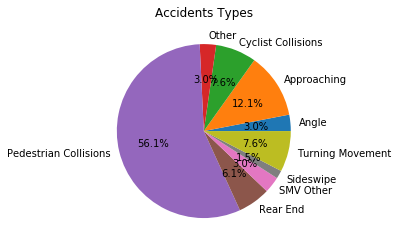

In [19]:
plt.pie(truck_victim.values, labels=truck_victim.index, autopct='%1.1f%%')
plt.title("Accidents Types")

In [20]:
#fatal number with truck(groupby YEAR)
truck_s = data_truck.groupby(by = 'YEAR')['FATAL_NO'].sum()

In [21]:
list(truck_s.values)

[228, 117, 106, 88, 20, 285, 109, 144, 184, 280, 231]

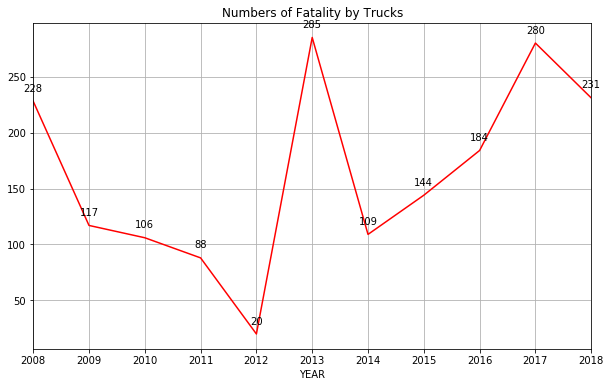

In [22]:
truck_s.plot(kind='line',
       #style = '--g.',
       color = 'red',
       alpha = 1,
       use_index = True,
       xticks = list(range(2008,2019)),
       rot = 0,
       grid = True,
       figsize = (10,6),
       title = 'Numbers of Fatality by Trucks')

xs = list(truck_s.index)
ys = list(truck_s.values)

for x,y in zip(xs,ys):
    label = "{:}".format(y)
    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center') 

In [23]:
truck_point = gpd.GeoDataFrame(data_truck, geometry='geometry')

Text(0.5, 1, 'Trucks accidents in Toronto')

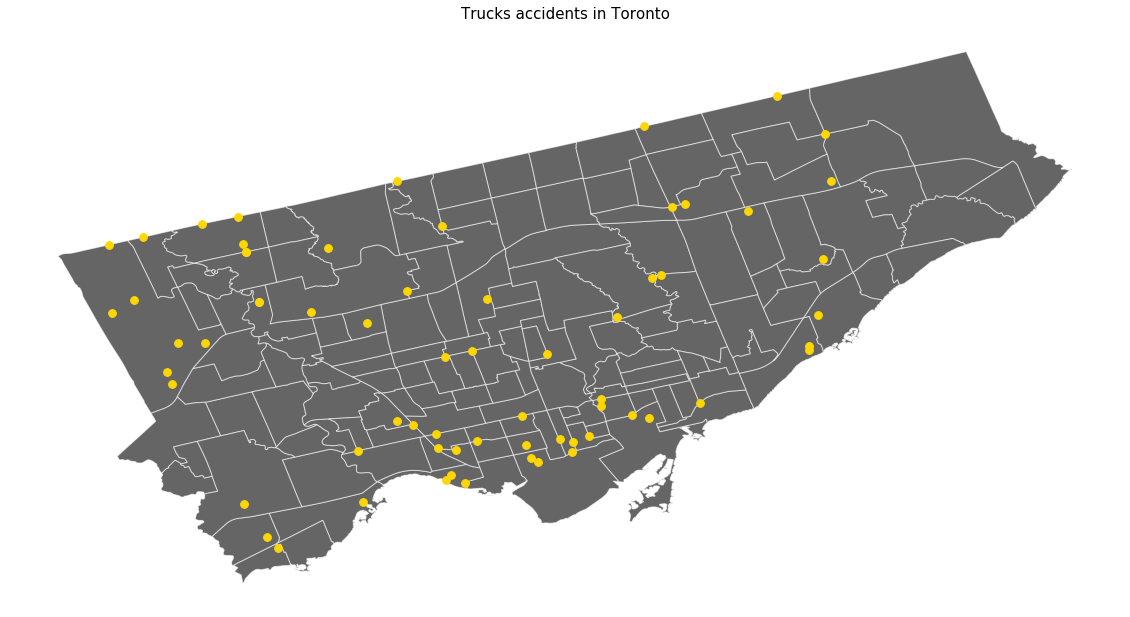

In [24]:
# visualize truck points from 2008 - 2018
fig = pl.figure(figsize = (20,20))
ax = fig.add_subplot(111)
shp_wgs.plot(ax=ax, color='black',alpha = .6,edgecolor='w')
truck_point.plot(ax=ax, color='gold', alpha = 1, markersize=60)
ax.axis('off')
pl.title('Trucks accidents in Toronto', fontsize=15)